In [ ]:
#Data Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


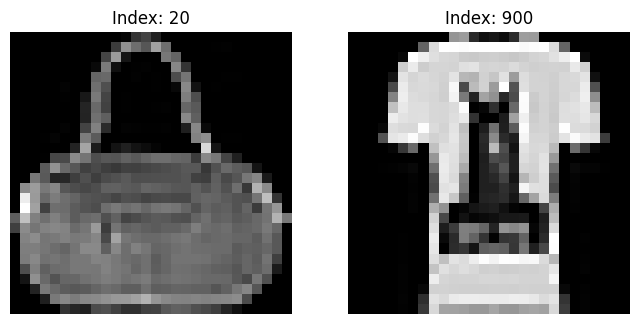

In [31]:
# Load Data Set
data = pd.read_csv('../datasets/fashion-mnist_train.csv')
img_size = 28
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(X[20].reshape(img_size, img_size), cmap='gray')
plt.title("Index: 20")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X[900].reshape(img_size, img_size), cmap='gray')
plt.title("Index: 900")
plt.axis('off')

plt.show()

In [26]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train.shape

(51000, 784)

In [28]:
# Evaluating the ANN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7677 - loss: 1.1651
Epoch 2/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8256 - loss: 0.4900
Epoch 3/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8377 - loss: 0.4499
Epoch 4/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8465 - loss: 0.4293
Epoch 5/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8520 - loss: 0.4090
Epoch 6/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.3934
Epoch 7/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8600 - loss: 0.3894
Epoch 8/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8658 - loss: 0.3768
Epoch 9/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.3636
Epoch 10/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 0.3573
Epoch 11/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8760 - loss: 0.3481
Epoch 12/100
1063/1

Epoch 1/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7841 - loss: 0.9215
Epoch 2/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8331 - loss: 0.4683
Epoch 3/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8458 - loss: 0.4321
Epoch 4/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8554 - loss: 0.4054
Epoch 5/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8595 - loss: 0.3911
Epoch 6/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8648 - loss: 0.3744
Epoch 7/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8686 - loss: 0.3686
Epoch 8/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8694 - loss: 0.3652
Epoch 9/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3522
Epoch 10/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8773 - loss: 0.3451
Epoch 11/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3469
Epoch 12/100
1594/1

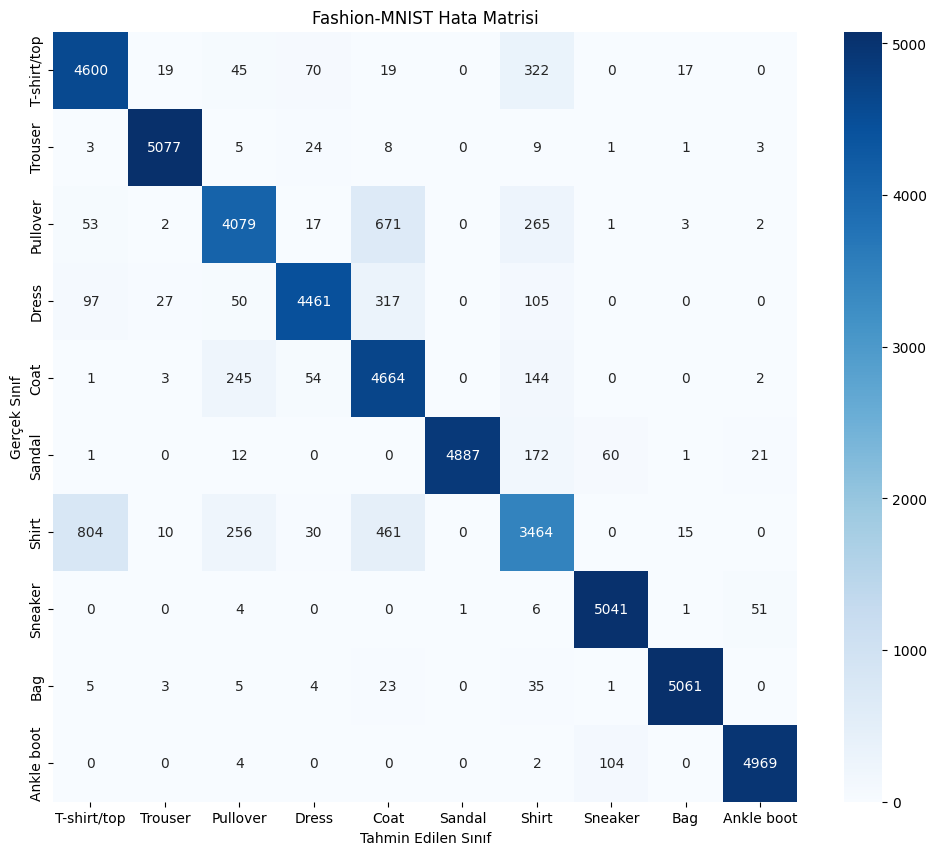

In [29]:
from sklearn.metrics import confusion_matrix
classifier.fit(X_train, y_train)

y_pred_probs = classifier.predict(X_train)
y_pred = np.argmax(y_pred_probs, axis=1) if len(y_pred_probs.shape) > 1 else y_pred_probs

cm = confusion_matrix(y_train, y_pred)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Fashion-MNIST Hata Matrisi')
plt.show()